# Problem Statement:
A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price.
The company is looking at prospective properties to buy to enter the market. 
The company wants to know:
    Which variables are significant in predicting the price of a house, and
    How well those variables describe the price of a house.

# Objective:
We need to model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

## Data Sourcing & Basic checks:

In [304]:
#Import required libraries to load data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [305]:
#Read data
house_df=pd.read_csv('train.csv')
house_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [306]:
house_df.shape #checking shape of dataframe

(1460, 81)

In [307]:
house_df.info() #getting idea of data types, non null values count

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [308]:
house_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0


In [309]:
# Checking null values
house_df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [310]:
round((house_df.isnull().sum())/len(house_df.index),2).sort_values(ascending=False).head(20)

PoolQC          1.00
MiscFeature     0.96
Alley           0.94
Fence           0.81
FireplaceQu     0.47
LotFrontage     0.18
GarageYrBlt     0.06
GarageFinish    0.06
GarageType      0.06
GarageQual      0.06
GarageCond      0.06
BsmtExposure    0.03
BsmtQual        0.03
BsmtCond        0.03
BsmtFinType2    0.03
BsmtFinType1    0.03
MasVnrType      0.01
MasVnrArea      0.01
Id              0.00
Functional      0.00
dtype: float64

In [311]:
#checking unique values for columns with high null values > 10%
house_df.PoolQC.value_counts()

Gd    3
Ex    2
Fa    2
Name: PoolQC, dtype: int64

In [312]:
house_df.MiscFeature.value_counts()

Shed    49
Gar2     2
Othr     2
TenC     1
Name: MiscFeature, dtype: int64

In [313]:
house_df.Alley.value_counts()

Grvl    50
Pave    41
Name: Alley, dtype: int64

In [314]:
house_df.Fence.value_counts()

MnPrv    157
GdPrv     59
GdWo      54
MnWw      11
Name: Fence, dtype: int64

In [315]:
house_df.FireplaceQu.value_counts()

Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: FireplaceQu, dtype: int64

In [316]:
house_df.LotFrontage.value_counts()

60.0     143
70.0      70
80.0      69
50.0      57
75.0      53
        ... 
137.0      1
141.0      1
38.0       1
140.0      1
46.0       1
Name: LotFrontage, Length: 110, dtype: int64

## Data Treatment :

In [317]:
# treating null values
house_df.PoolQC=house_df.PoolQC.fillna('no_pool')
house_df.MiscFeature=house_df.MiscFeature.fillna('None')
house_df.Alley=house_df.Alley.fillna('no_access')
house_df.Fence=house_df.Fence.fillna('no_fence')
house_df.FireplaceQu=house_df.FireplaceQu.fillna('no_fireplace')
house_df.GarageYrBlt=house_df.GarageYrBlt.fillna(0)
house_df.MasVnrType=house_df.MasVnrType.fillna('None')
house_df.MasVnrArea=house_df.MasVnrArea.fillna(0)
house_df.Electrical=house_df.Electrical.fillna('others')

In [318]:
#dropping LotFrontage column as it has more unique values with high null values
house_df.drop('LotFrontage',axis=1,inplace=True)

In [319]:
house_df.head()

,Id,MSSubClass,MSZoning,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,8450,Pave,no_access,Reg,Lvl,AllPub,Inside,...,0,no_pool,no_fence,None,0,2,2008,WD,Normal,208500
1,2,20,RL,9600,Pave,no_access,Reg,Lvl,AllPub,FR2,...,0,no_pool,no_fence,None,0,5,2007,WD,Normal,181500
2,3,60,RL,11250,Pave,no_access,IR1,Lvl,AllPub,Inside,...,0,no_pool,no_fence,None,0,9,2008,WD,Normal,223500
3,4,70,RL,9550,Pave,no_access,IR1,Lvl,AllPub,Corner,...,0,no_pool,no_fence,None,0,2,2006,WD,Abnorml,140000
4,5,60,RL,14260,Pave,no_access,IR1,Lvl,AllPub,FR2,...,0,no_pool,no_fence,None,0,12,2008,WD,Normal,250000


In [320]:
house_df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodDeckSF'

In [321]:
# treating NaN values in basement related columns
for col in ('BsmtFinType1','BsmtFinType2','BsmtExposure','BsmtQual','BsmtCond'):
    house_df[col]=house_df[col].fillna('no_basement')

In [322]:
# treating NaN values in Garage related columns
for col in ('GarageFinish','GarageType','GarageQual','GarageCond'):
    house_df[col]=house_df[col].fillna('no_garage')

In [323]:
house_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [324]:
# all values are numeric so changing it to int instead of float
house_df.GarageYrBlt=house_df.GarageYrBlt.astype(int) 

In [325]:
#Converting year to age
house_df['built_age']=house_df.YearBuilt.max()-house_df.YearBuilt
house_df['remodAdd_age']=house_df.YearRemodAdd.max()-house_df.YearRemodAdd
house_df['sold_age']=house_df.YrSold.max()-house_df.YrSold
house_df['garageBuilt_age']=house_df.GarageYrBlt.max()-house_df.GarageYrBlt

In [326]:
#dropping columns YearBuilt,YearRemodAdd,YrSold,GarageYrBlt
house_df.drop(['YearBuilt','YearRemodAdd','YrSold','GarageYrBlt'],axis=1,inplace=True)

In [327]:
house_df[['built_age','remodAdd_age','sold_age','garageBuilt_age']].head(5)

,built_age,remodAdd_age,sold_age,garageBuilt_age
0,7,7,2,7
1,34,34,3,34
2,9,8,2,9
3,95,40,4,12
4,10,10,2,10


## EDA :

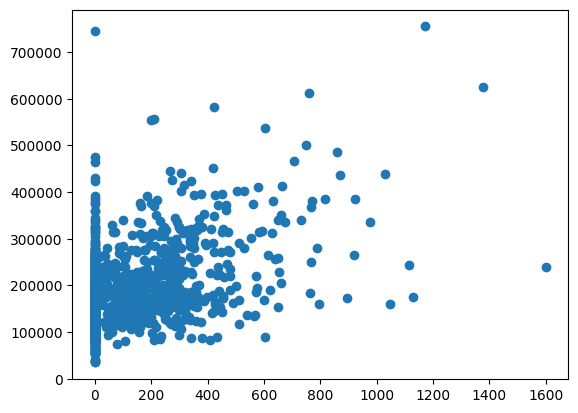

In [328]:
# scatter plot of Masonry veneer area in square feet vs sale price
plt.scatter(house_df.MasVnrArea,house_df.SalePrice)

<AxesSubplot: xlabel='MasVnrArea', ylabel='Density'>

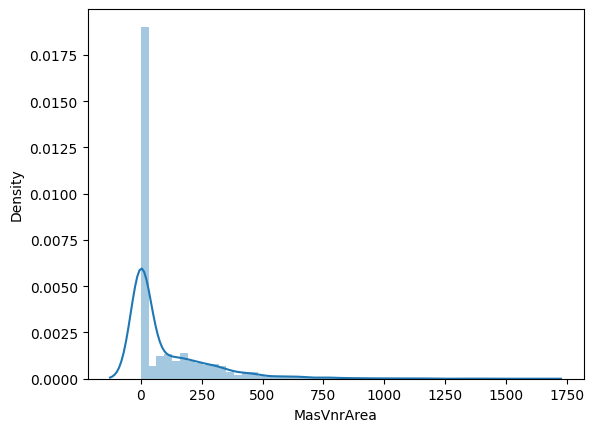

In [329]:
sns.distplot(house_df.MasVnrArea)# distplot

<AxesSubplot: xlabel='SalePrice', ylabel='Density'>

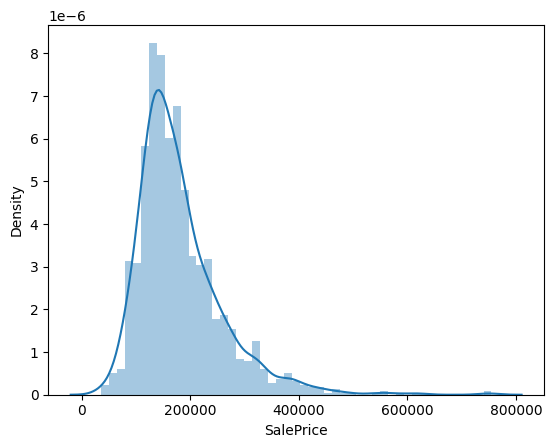

In [330]:
sns.distplot(house_df.SalePrice)# distplot

In [331]:
#checking symmetry measures
house_df.SalePrice.skew(),house_df.SalePrice.kurt()

(1.8828757597682129, 6.536281860064529)

<AxesSubplot: xlabel='BsmtCond', ylabel='count'>

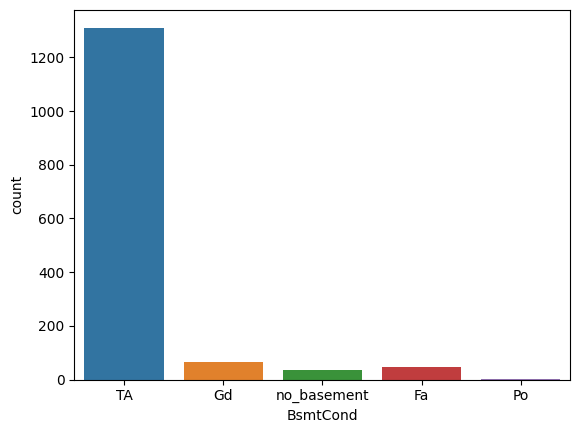

In [332]:
# checking basement count
sns.countplot(x=house_df.BsmtCond,data=house_df)

<AxesSubplot: xlabel='OverallCond', ylabel='count'>

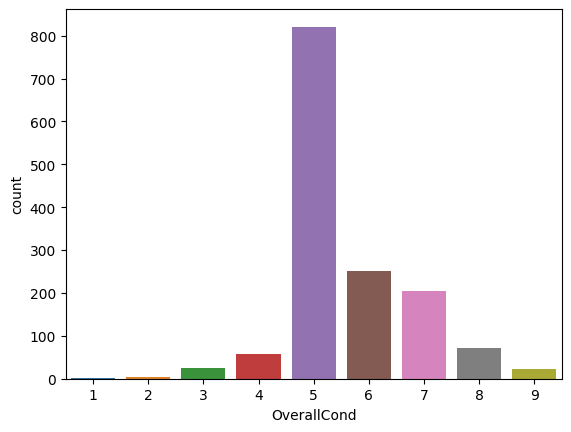

In [333]:
#checking overall condition counts
# 10	Very Excellent, 9	Excellent, 8	Very Good, 7	Good, 6	Above Average	,5	Average, 4	Below Average	
# 3	Fair, 2	Poor, 1	Very Poor
sns.countplot(x=house_df.OverallCond,data=house_df) # most housed are in average condition

<AxesSubplot: xlabel='SalePrice'>

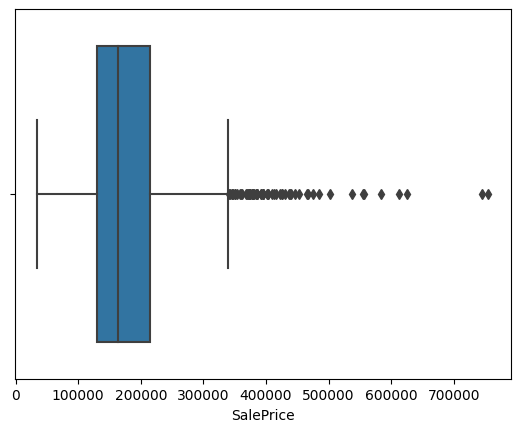

In [334]:
# checking outliars 
sns.boxplot(x=house_df.SalePrice)

<AxesSubplot: xlabel='OverallCond', ylabel='SalePrice'>

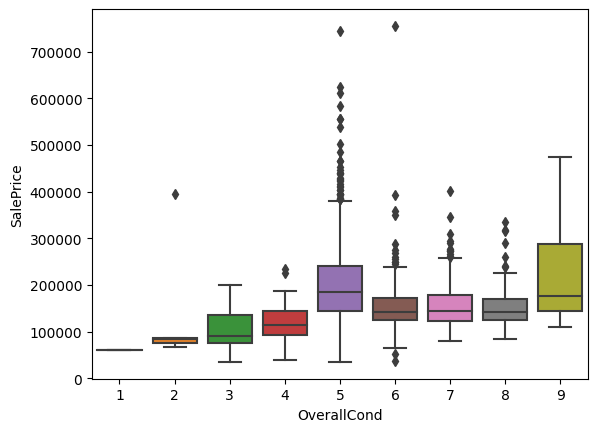

In [335]:
#Overall condition VS sale price
sns.boxplot(x='OverallCond',y='SalePrice',data=house_df)

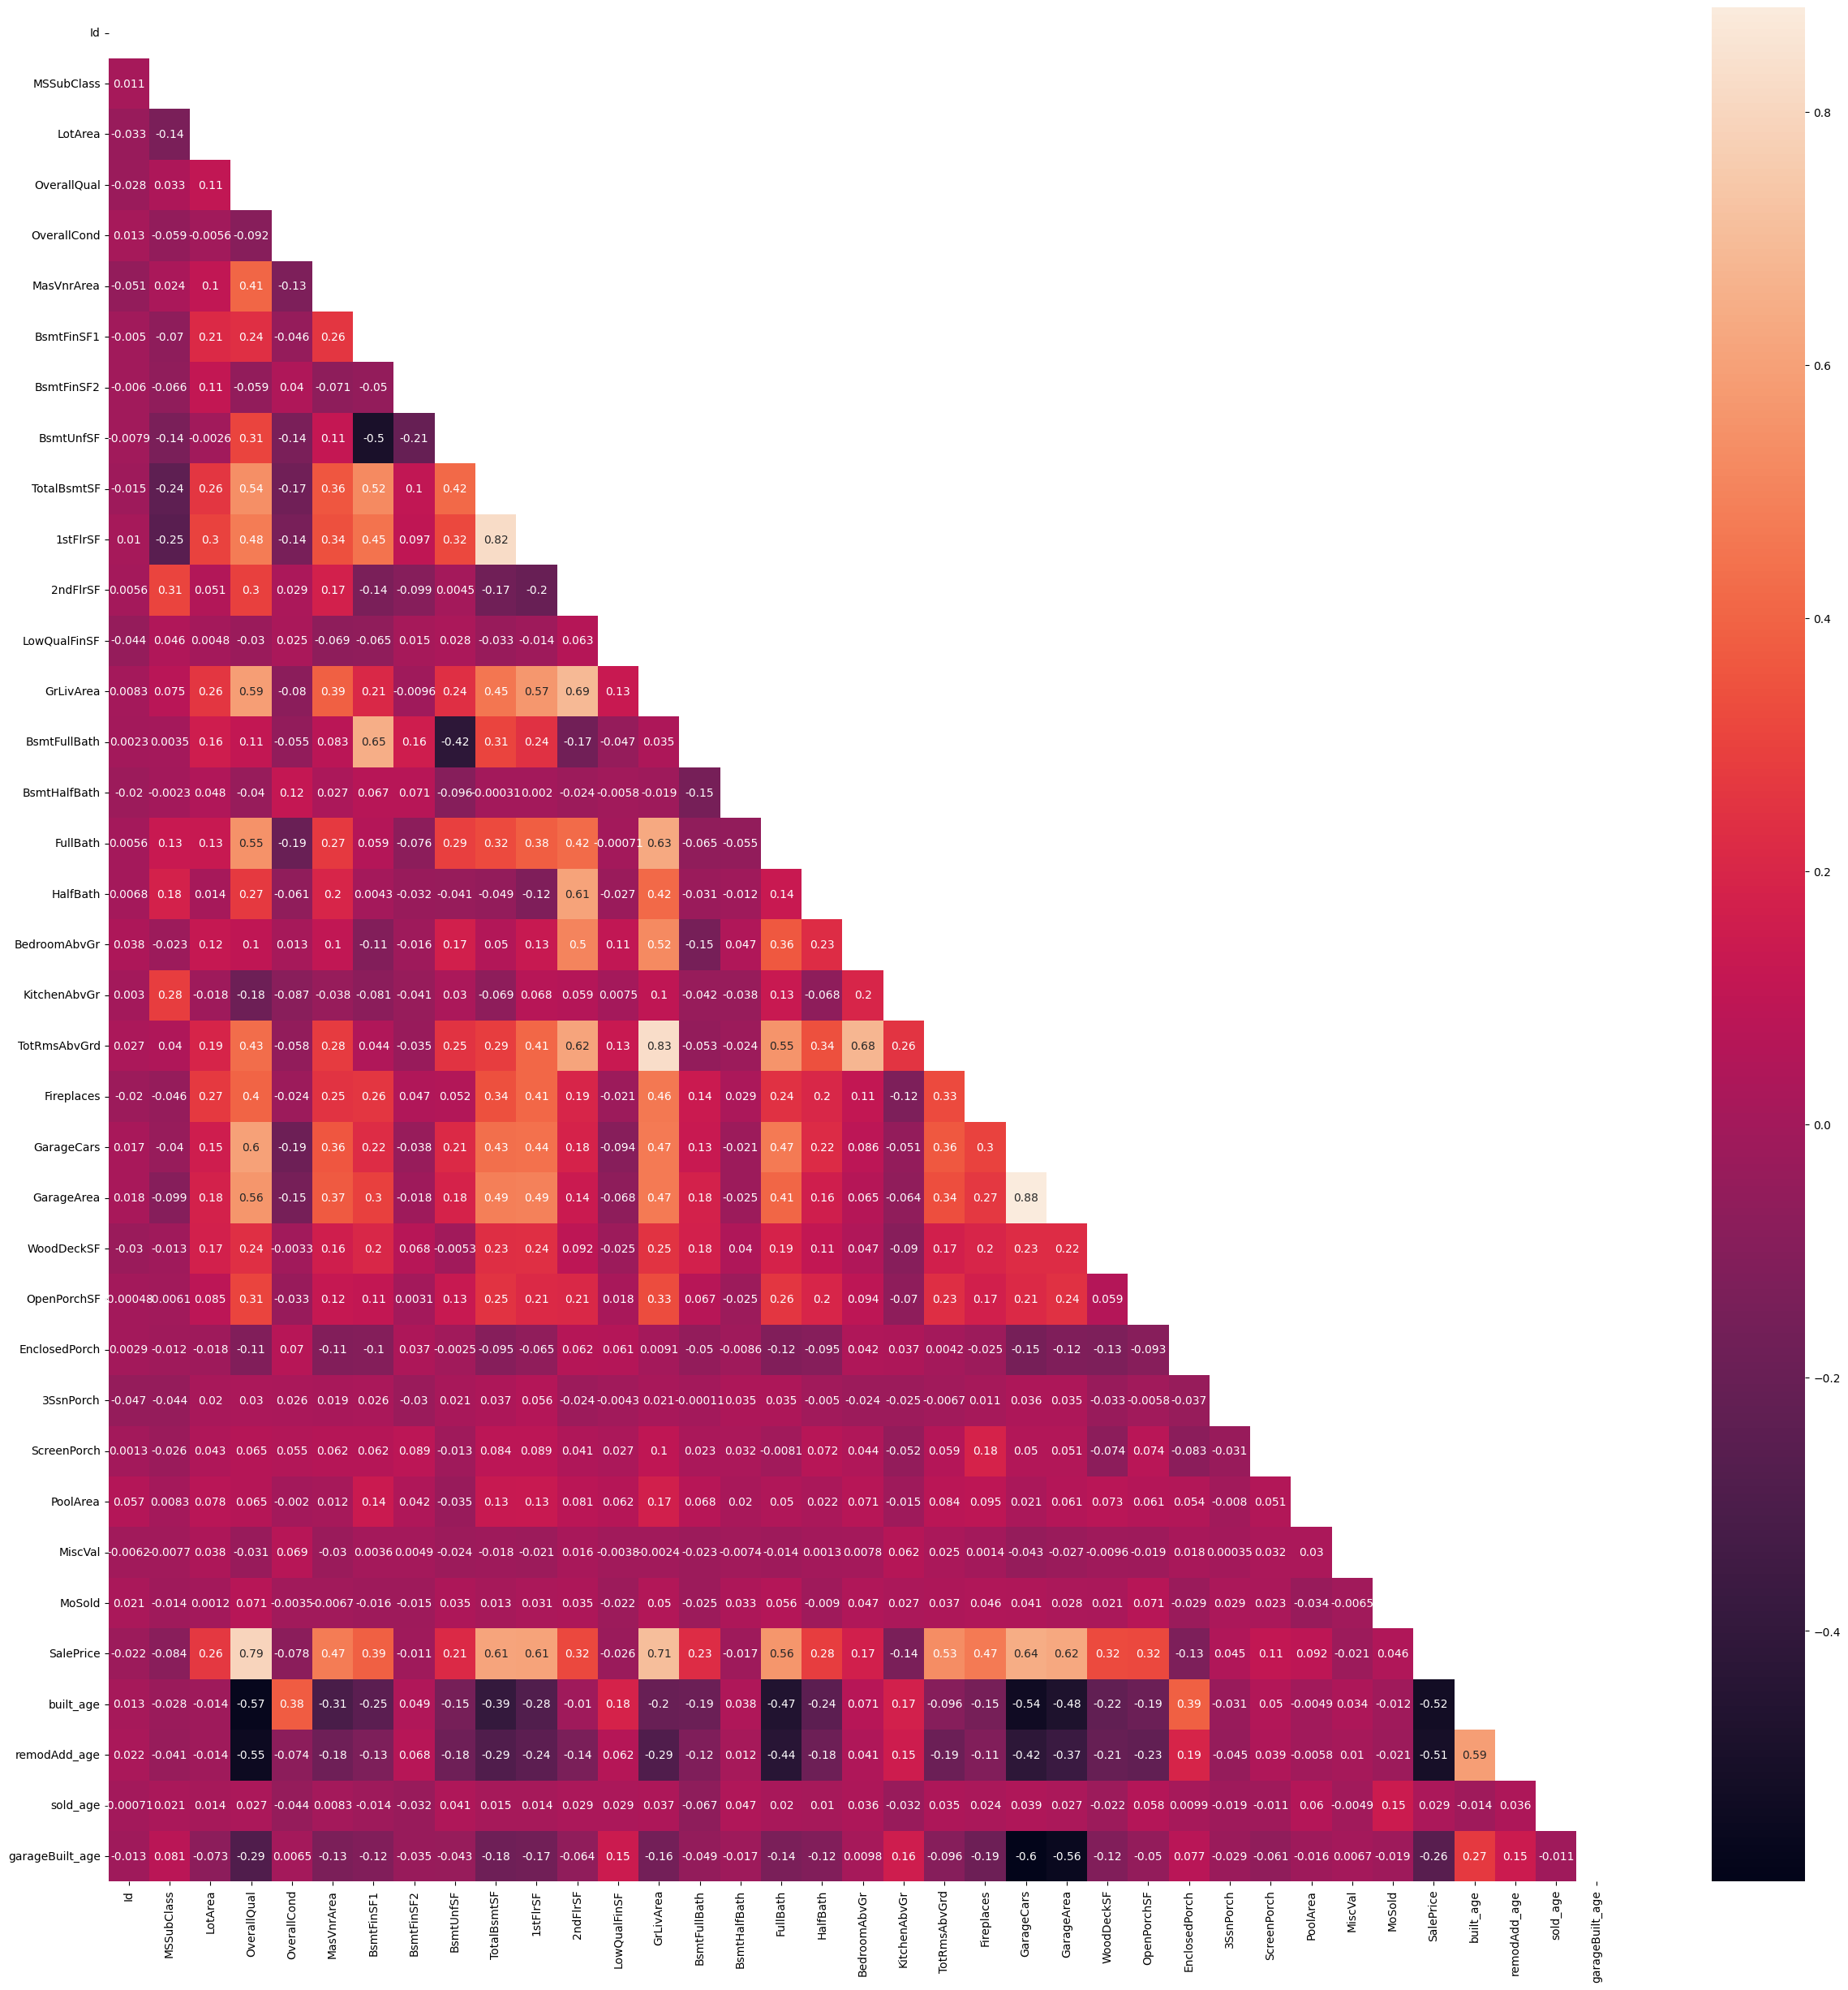

In [336]:
# Heatmap
f, ax=plt.subplots(figsize=(30,30))
matrix=np.triu(house_df.corr())
sns.heatmap(house_df.corr(),annot=True,mask=matrix)
plt.show()

## Data Preparation :

In [337]:
# getting all numeric columns
num_col=house_df.select_dtypes(include=['float64','int64'])
num_col.columns

Index(['Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond',
       'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'SalePrice', 'built_age', 'remodAdd_age',
       'sold_age', 'garageBuilt_age'],
      dtype='object')

In [338]:
#converting binary variables into numeric, mapping to 0 & 1
house_df.Street=house_df.Street.apply(lambda x:1 if x=='Pav' else 0)
house_df.CentralAir=house_df.CentralAir.apply(lambda x:1 if x=='Y' else 0)
house_df.PavedDrive=house_df.PavedDrive.apply(lambda x:1 if x=='Y' else 0)

In [339]:
cat_var=house_df.select_dtypes(include=['object'])
cat_var.head()

,MSZoning,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,no_access,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,no_fireplace,Attchd,RFn,TA,TA,no_pool,no_fence,None,WD,Normal
1,RL,no_access,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,...,TA,Attchd,RFn,TA,TA,no_pool,no_fence,None,WD,Normal
2,RL,no_access,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,TA,Attchd,RFn,TA,TA,no_pool,no_fence,None,WD,Normal
3,RL,no_access,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,...,Gd,Detchd,Unf,TA,TA,no_pool,no_fence,None,WD,Abnorml
4,RL,no_access,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,...,TA,Attchd,RFn,TA,TA,no_pool,no_fence,None,WD,Normal


In [340]:
#getting dummies
data_dummies=pd.get_dummies(cat_var,drop_first=True)
data_dummies.head()

,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Alley_Pave,Alley_no_access,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,1,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0
1,0,0,1,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0
2,0,0,1,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
3,0,0,1,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,1,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [341]:
#dropping id column
df=house_df.drop(['Id'],axis=1)

In [342]:
#dropping original categorical variables
df=df.drop(list(cat_var.columns),axis=1)

In [343]:
#Adding dummy categorical variables to the dataset
df=pd.concat([df,data_dummies],axis=1)

## Modeling :

In [344]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.model_selection import KFold
from sklearn.feature_selection import RFE
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score,mean_squared_error
from sklearn import metrics

In [345]:
df_train,df_test = train_test_split(df,train_size=0.7,test_size=0.3,random_state=42)

In [346]:
y_train = np.log(df_train.SalePrice)
X_train = df_train.drop('SalePrice',axis=1)
y_test = np.log(df_test.SalePrice)
X_test = df_test.drop('SalePrice',axis=1)

In [347]:
cont_vars=X_train.select_dtypes(['int64','float64']).columns
cont_vars

Index(['MSSubClass', 'LotArea', 'Street', 'OverallQual', 'OverallCond',
       'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       'CentralAir', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars',
       'GarageArea', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'built_age', 'remodAdd_age', 'sold_age', 'garageBuilt_age'],
      dtype='object')

In [348]:
#Scaling variables
scaler = StandardScaler()
X_train[cont_vars]=scaler.fit_transform(X_train[cont_vars])
X_test[cont_vars]=scaler.fit_transform(X_test[cont_vars])

In [349]:
#Building regression model
reg = LinearRegression()
reg.fit(X_train,y_train)

LinearRegression()

In [350]:
#calculate RFE
rfe = RFE(reg, n_features_to_select=50)
rfe = rfe.fit(X_train,y_train)

In [351]:
cols=X_train.columns[rfe.support_]
cols

Index(['BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'garageBuilt_age',
       'MSZoning_FV', 'MSZoning_RL', 'Condition2_PosA', 'Condition2_PosN',
       'Condition2_RRAe', 'Condition2_RRNn', 'RoofMatl_CompShg',
       'RoofMatl_Membran', 'RoofMatl_Metal', 'RoofMatl_Roll',
       'RoofMatl_Tar&Grv', 'RoofMatl_WdShake', 'RoofMatl_WdShngl',
       'Exterior1st_BrkComm', 'Exterior1st_CBlock', 'Exterior1st_ImStucc',
       'Exterior2nd_CBlock', 'BsmtQual_no_basement', 'BsmtCond_no_basement',
       'BsmtExposure_no_basement', 'BsmtFinType1_no_basement',
       'BsmtFinType2_no_basement', 'Electrical_Mix', 'Functional_Sev',
       'GarageType_no_garage', 'GarageFinish_no_garage', 'GarageQual_Fa',
       'GarageQual_Gd', 'GarageQual_Po', 'GarageQual_TA',
       'GarageQual_no_garage', 'GarageCond_Fa', 'GarageCond_Gd',
       'GarageCond_Po', 'GarageCond_TA', 'GarageCond_no_garage', 'PoolQC_Fa',
       'MiscFeature_None', '

In [352]:
import statsmodels
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [353]:
X_train_sm = X_train[cols] # create dataframe for model
X_train_sm = sm.add_constant(X_train_sm)  # adding constant to the dataframe

In [354]:
# create model
lr = sm.OLS(y_train,X_train_sm)
lr_model = lr.fit()  # fit the model
lr_model.summary()   # print summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.801
Model:                            OLS   Adj. R-squared:                  0.794
Method:                 Least Squares   F-statistic:                     120.2
Date:                Wed, 05 Oct 2022   Prob (F-statistic):          7.20e-319
Time:                        14:53:33   Log-Likelihood:                 326.14
No. Observations:                1021   AIC:                            -584.3
Df Residuals:                     987   BIC:                            -416.7
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        6.3894      0.204     31.380      0.000       5.990       6.789
BsmtFinSF1                   0.0699      0.006     11.901      0.000       0.058       0.081
BsmtFinSF2                   0.0074      0.006      1.279      0.201      -0.004       0.019
BsmtUnfSF                    0.0179      0.006      3.156      0.002       0.007       0.029
TotalBsmtSF                  0.0922      0.010      9.429      0.000       0.073       0.111
1stFlrSF                     0.0579      0.010      6.080      0.000       0.039       0.077
2ndFlrSF                     0.0860      0.005     16.064      0.000       0.075       0.097
LowQualFinSF                -0.0167      0.006     -2.693      0.007      -0.029      -0.005
GrLivArea                    0.1124      0.005     24.115      0.000       0.103       0.121
garageBuilt_age             -1.7566      0.125    -14.030      0.000      -2.002      -1.511
MSZoning_FV                  0.2253      0.033      6.919      0.000       0.161       0.289
MSZoning_RL                  0.1394      0.017      8.362      0.000       0.107       0.172
Condition2_PosA          -5.182e-15   4.59e-16    -11.284      0.000   -6.08e-15   -4.28e-15
Condition2_PosN             -0.9261      0.130     -7.117      0.000      -1.181      -0.671
Condition2_RRAe              1.1813      0.158      7.479      0.000       0.871       1.491
Condition2_RRNn           1.376e-14   1.17e-15     11.745      0.000    1.15e-14    1.61e-14
RoofMatl_CompShg             3.5397      0.205     17.232      0.000       3.137       3.943
RoofMatl_Membran         -5.671e-16   1.41e-16     -4.023      0.000   -8.44e-16    -2.9e-16
RoofMatl_Metal               3.7924      0.272     13.918      0.000       3.258       4.327
RoofMatl_Roll                3.3878      0.275     12.306      0.000       2.848       3.928
RoofMatl_Tar&Grv             3.7244      0.216     17.221      0.000       3.300       4.149
RoofMatl_WdShake             3.6631      0.230     15.958      0.000       3.213       4.114
RoofMatl_WdShngl             3.5554      0.225     15.795      0.000       3.114       3.997
Exterior1st_BrkComm         -0.5631      0.134     -4.210      0.000      -0.826      -0.301
Exterior1st_CBlock          -0.1747      0.090     -1.950      0.051      -0.350       0.001
Exterior1st_ImStucc      -2.017e-16   1.02e-16     -1.970      0.049   -4.03e-16   -7.81e-19
Exterior2nd_CBlock          -0.1747      0.090     -1.950      0.051      -0.350       0.001
BsmtQual_no_basement         0.0022      0.010      0.219      0.827      -0.017       0.022
BsmtCond_no_basement         0.0022      0.010      0.219      0.827      -0.017       0.022
BsmtExposure_no_basement     0.0022      0.010      0.219      0.827      -0.017       0.022
BsmtFinType1_n

## Ridge Regression :

In [355]:
# Considering alpha to tune
params = {'alpha':[0.001, 0.01, 0.1,1.0, 5.0, 10.0,20.0]}
ridge = Ridge()

#Cross validation
fold=KFold(n_splits=10,shuffle=True,random_state=100)
model_cv = GridSearchCV(estimator=ridge,
                       param_grid=params,
                       scoring='r2',
                       cv=fold,
                       return_train_score=True,
                       verbose=1)
model_cv.fit(X_train,y_train)   # fit the model

Fitting 10 folds for each of 7 candidates, totalling 70 fits


GridSearchCV(cv=KFold(n_splits=10, random_state=100, shuffle=True),
             estimator=Ridge(),
             param_grid={'alpha': [0.001, 0.01, 0.1, 1.0, 5.0, 10.0, 20.0]},
             return_train_score=True, scoring='r2', verbose=1)

In [356]:
# printing best parameters and score
print(model_cv.best_params_)
print(model_cv.best_score_)

{'alpha': 20.0}
0.8374407594096869


In [357]:
cv_result = pd.DataFrame(model_cv.cv_results_)
cv_result = cv_result[cv_result.param_alpha<=100]
cv_result

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.031904,0.018254,0.002125,0.001324,0.001,{'alpha': 0.001},0.891821,0.717183,0.898754,0.797629,...,0.948363,0.948941,0.949773,0.956034,0.949055,0.948045,0.948736,0.948513,0.950572,0.003603
1,0.058991,0.021268,0.002386,0.001250,0.01,{'alpha': 0.01},0.891035,0.720957,0.900241,0.817875,...,0.948213,0.948797,0.949602,0.955851,0.948898,0.947987,0.948715,0.948347,0.950434,0.003579
2,0.063522,0.022815,0.002716,0.001380,0.1,{'alpha': 0.1},0.885191,0.736888,0.904208,0.879772,...,0.944888,0.945325,0.945972,0.951689,0.945651,0.946914,0.948257,0.944878,0.947448,0.003222
3,0.077724,0.039836,0.002197,0.001268,1.0,{'alpha': 1.0},0.881364,0.757270,0.914380,0.900186,...,0.933457,0.933816,0.934740,0.937371,0.934690,0.937328,0.944544,0.934000,0.936890,0.003790
4,0.052329,0.017280,0.003164,0.001433,5.0,{'alpha': 5.0},0.884393,0.764201,0.927095,0.904467,...,0.921981,0.922819,0.923957,0.924474,0.923637,0.925406,0.937229,0.923416,0.926171,0.004804
5,0.061735,0.034140,0.004738,0.002231,10.0,{'alpha': 10.0},0.886398,0.764645,0.932702,0.906576,...,0.915901,0.916806,0.918208,0.918206,0.917899,0.919264,0.932839,0.917667,0.920491,0.005304
6,0.071040,0.037541,0.004574,0.002396,20.0,{'alpha': 20.0},0.888703,0.763966,0.936935,0.907411,...,0.908586,0.909565,0.911347,0.910931,0.911023,0.912200,0.927560,0.910691,0.913699,0.005898


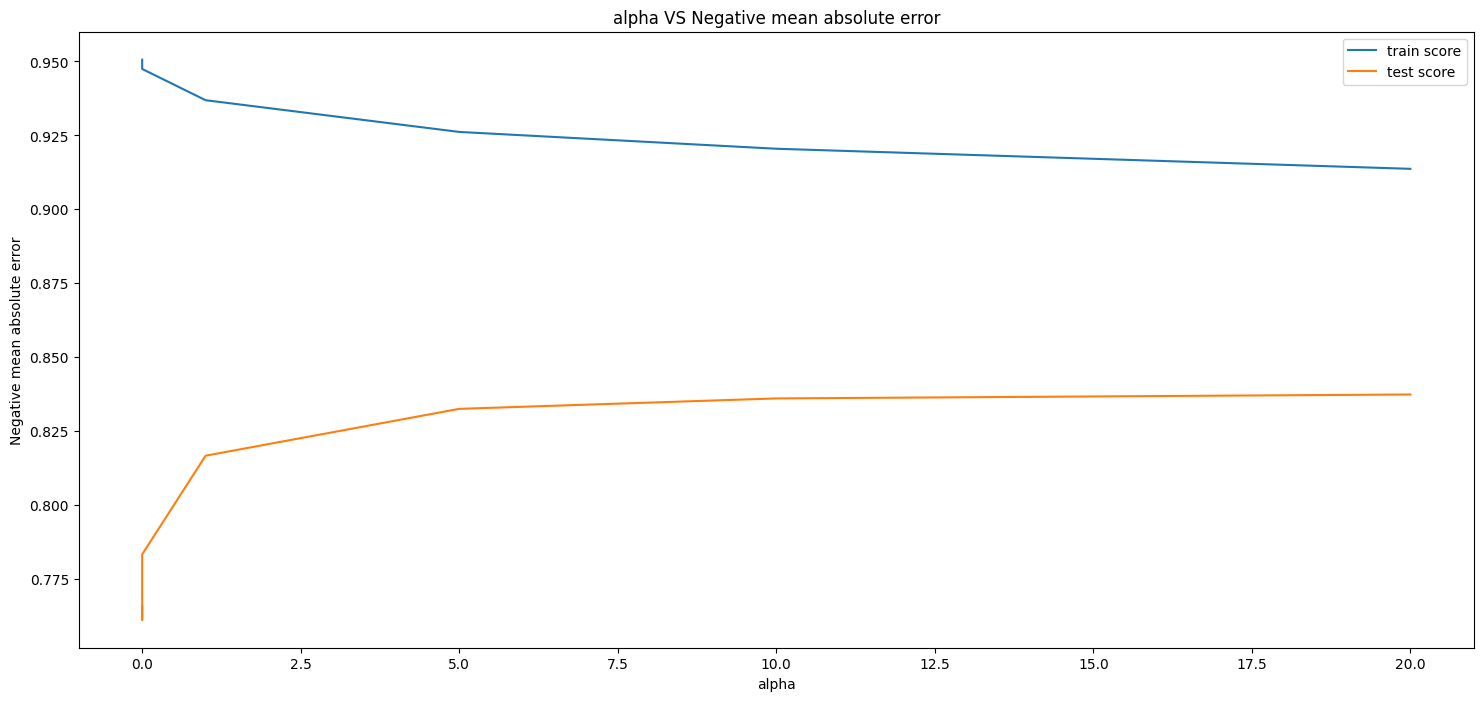

In [358]:
#Plot mean test & train score with alpha
cv_result.param_alpha = cv_result.param_alpha.astype('int32')
plt.figure(figsize=(18,8))

plt.plot(cv_result.param_alpha,cv_result.mean_train_score)
plt.plot(cv_result.param_alpha,cv_result.mean_test_score)
plt.xlabel('alpha')
plt.ylabel('Negative mean absolute error')
plt.title('alpha VS Negative mean absolute error')
plt.legend(['train score','test score'],loc='upper right')
plt.show()

In [359]:
# Final Ridge model
alpha = 20
ridge = Ridge(alpha=alpha)
ridge.fit(X_train,y_train)
ridge.coef_

array([-0.02614579,  0.01549343,  0.        ,  0.08535548,  0.03977837,
       -0.00251138, -0.0059023 ,  0.00537267,  0.00154361, -0.00271373,
        0.01852711,  0.02780644,  0.03686625,  0.0054632 ,  0.05150236,
        0.03002126,  0.00384161,  0.02022142,  0.01667455,  0.01032331,
       -0.00874859,  0.02787931,  0.01870424,  0.04431968,  0.00343593,
        0.00610503,  0.01503269, -0.00372808,  0.01077146,  0.00818874,
        0.01726112, -0.00858961, -0.00247152,  0.00530497, -0.04027904,
       -0.02203041,  0.00289166, -0.01193333,  0.02653296,  0.00532226,
        0.02930665, -0.02578341,  0.02968299, -0.02262062,  0.01602139,
       -0.03949171, -0.00168413,  0.04866922,  0.01934088,  0.03791609,
       -0.00960111,  0.0322827 , -0.02240399, -0.00748608, -0.01016754,
        0.00570793,  0.00874223, -0.0041471 , -0.00934298,  0.02258002,
        0.02592997, -0.01784201,  0.07114308, -0.04978917, -0.03399137,
       -0.02472621, -0.03494396, -0.01079344, -0.02187285, -0.00

In [360]:
# evaluate r-squared value, predict on train set
y_train_pred = ridge.predict(X_train)
print(metrics.r2_score(y_true=y_train,y_pred=y_train_pred))

0.9119947994302648


In [361]:
# evaluate r-squared value, predict on test set
y_test_pred = ridge.predict(X_test)
print(metrics.r2_score(y_true=y_test,y_pred=y_test_pred))

0.8927993758613273


In [362]:
#Print mean squeared error
mean_squared_error(y_test,y_test_pred)

0.018186174770068186

## Lasso Regression :

In [363]:
# Considering alpha to tune
params = {'alpha':[0.00005,0.0001,0.001,0.008,0.01]}
lasso = Lasso()

#Cross validation
fold=KFold(n_splits=10,shuffle=True,random_state=100)
lasso_cv = GridSearchCV(estimator=lasso,
                       param_grid=params,
                       scoring='r2',
                       cv=fold,
                       return_train_score=True,
                       verbose=1)
lasso_cv.fit(X_train,y_train)   # fit the model

Fitting 10 folds for each of 5 candidates, totalling 50 fits


GridSearchCV(cv=KFold(n_splits=10, random_state=100, shuffle=True),
             estimator=Lasso(),
             param_grid={'alpha': [5e-05, 0.0001, 0.001, 0.008, 0.01]},
             return_train_score=True, scoring='r2', verbose=1)

In [364]:
# printing best parameters and score
print(lasso_cv.best_params_)
print(lasso_cv.best_score_)

{'alpha': 0.001}
0.8275110586654856


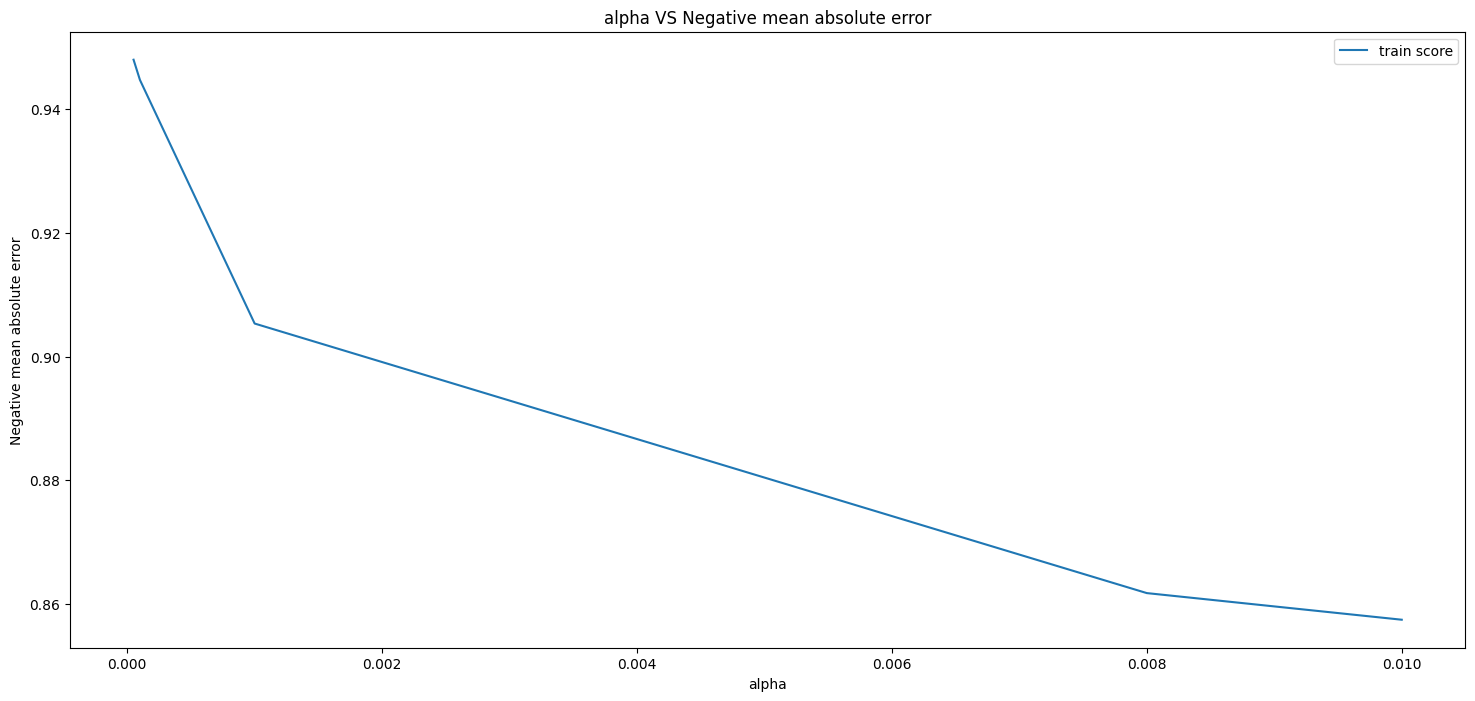

In [365]:
cv_result_lasso = pd.DataFrame(lasso_cv.cv_results_)

#Plot mean test & train score with alpha
cv_result_lasso.param_alpha = cv_result_lasso.param_alpha.astype('float32')
plt.figure(figsize=(18,8))

plt.plot(cv_result_lasso.param_alpha,cv_result_lasso.mean_train_score)
plt.xlabel('alpha')
plt.ylabel('Negative mean absolute error')
plt.title('alpha VS Negative mean absolute error')
plt.legend(['train score','test score'],loc='upper right')
plt.show()

In [366]:
# Final Lasso model
alpha = 0.001
lasso = Lasso(alpha=alpha)
lasso.fit(X_train,y_train)
lasso.coef_

array([-2.87298438e-02,  1.61871767e-02,  0.00000000e+00,  9.29068612e-02,
        4.05982159e-02, -2.37926362e-03, -1.29115087e-05,  3.84717932e-03,
        4.90134737e-03,  0.00000000e+00,  1.78028784e-02,  0.00000000e+00,
        3.48686605e-03,  3.32423430e-04,  8.81564532e-02,  3.23968964e-02,
        4.00926176e-03,  1.79614991e-02,  1.40906902e-02,  7.58242713e-03,
       -7.23645802e-03,  2.67424723e-02,  1.96831648e-02,  5.16298429e-02,
        0.00000000e+00,  5.99966603e-03,  1.52117640e-02, -1.04273075e-03,
        9.08376585e-03,  7.12990591e-03,  1.73211004e-02, -1.01822521e-02,
       -2.31852891e-03,  3.81473200e-03, -4.41277212e-02, -2.41795299e-02,
        3.02507765e-03, -9.56331483e-03,  0.00000000e+00, -0.00000000e+00,
        1.74000379e-03, -4.91938998e-02,  2.06627299e-02, -1.03046869e-02,
        0.00000000e+00, -2.96610730e-02, -0.00000000e+00,  2.06909793e-02,
        0.00000000e+00,  1.24393465e-02, -0.00000000e+00,  3.88229097e-02,
       -0.00000000e+00, -

In [367]:
# evaluate r-squared value, predict on train set
y_train_pred = lasso.predict(X_train)
print(metrics.r2_score(y_true=y_train,y_pred=y_train_pred))

0.9013056802607013


In [368]:
# evaluate r-squared value, predict on test set
y_test_pred = lasso.predict(X_test)
print(metrics.r2_score(y_true=y_test,y_pred=y_test_pred))

0.8930870166728498


In [369]:
#Print mean squeared error
mean_squared_error(y_test,y_test_pred)

0.01813737760949768

## Comparing Ridge and Lasso :

In [370]:
print('optimal value for alpha for Ridge :',model_cv.best_params_ )
print('optimal value for alpha for Lasso :',lasso_cv.best_params_ )

optimal value for alpha for Ridge : {'alpha': 20.0}
optimal value for alpha for Lasso : {'alpha': 0.001}


In [371]:
ridge = Ridge(alpha=20)
ridge.fit(X_train,y_train)
# evaluate r-squared value, predict on train set
y_pred_train = ridge.predict(X_train)
print('Ridge r2 train score :',metrics.r2_score(y_true=y_train,y_pred=y_pred_train))
# evaluate r-squared value, predict on test set
y_pred_test = ridge.predict(X_test)
print('Ridge r2 test score :',metrics.r2_score(y_true=y_test,y_pred=y_pred_test))

Ridge r2 train score : 0.9119947994302648
Ridge r2 test score : 0.8927993758613273


In [372]:
model_parameter = list(ridge.coef_)
model_parameter.insert(0,ridge.intercept_)
col=df_train.columns
col.insert(0,'constant')
ridge_coef = pd.DataFrame(list(zip(col,model_parameter)))
ridge_coef.columns=['features','coef']
ridge_coef.sort_values(by='coef',ascending=False).head(10)

,features,coef
0,MSSubClass,11.882409
4,OverallCond,0.085355
63,Neighborhood_Crawfor,0.071143
79,Neighborhood_StoneBr,0.067951
122,Exterior1st_BrkFace,0.063091
73,Neighborhood_NridgHt,0.055402
15,BsmtFullBath,0.051502
83,Condition1_Norm,0.051177
210,Functional_Typ,0.050217
48,LandContour_HLS,0.048669


In [373]:
lasso = Lasso(alpha=0.001)
lasso.fit(X_train,y_train)
# evaluate r-squared value, predict on train set
y_train_pl = lasso.predict(X_train)
print('Lasso r2 train score :',metrics.r2_score(y_true=y_train,y_pred=y_train_pl))
# evaluate r-squared value, predict on test set
y_test_pl = lasso.predict(X_test)
print('Lasso r2 test score :',metrics.r2_score(y_true=y_test,y_pred=y_test_pl))

Lasso r2 train score : 0.9013056802607013
Lasso r2 test score : 0.8930870166728498


In [374]:
model_parameter_l = list(lasso.coef_)
model_parameter_l.insert(0,lasso.intercept_)
col_l=df_train.columns
col_l.insert(0,'constant')
lasso_coef = pd.DataFrame(list(zip(col_l,model_parameter_l)))
lasso_coef.columns=['features','coef']
lasso_coef.sort_values(by='coef',ascending=False).head(10)

,features,coef
0,MSSubClass,11.918059
79,Neighborhood_StoneBr,0.106228
4,OverallCond,0.092907
63,Neighborhood_Crawfor,0.092154
15,BsmtFullBath,0.088156
122,Exterior1st_BrkFace,0.083710
73,Neighborhood_NridgHt,0.081707
83,Condition1_Norm,0.055699
172,BsmtExposure_Gd,0.052596
24,GarageArea,0.051630


#### Best alpha for Lasso : {alpha : 0.001}
#### Best alpha for Ridge : {alpha : 20}

#### After comparing both Ridge and Lasso model we can see that r2 score are better in case of lasso (in termas of difference in performance on train set vs test set) and it will penelize more on the dataset and also helps in feature elimination and hence lasso model with alpha of 0.001 should be considered for this dataset.

#### Based on above comparision we can say that below features are best explaining the house prices to get for the company
- MSSubClass
- Neighborhood_StoneBr
- OverallCond 
- Neighborhood_Crawfor
- BsmtFullBath
- Exterior1st_BrkFace 
- Neighborhood_NridgHt
- Condition1_Norm
- BsmtExposure_Gd
- GarageArea

## Subjective QA workarounds:

In [375]:
#Creating Ridge model after doubling the Alpha value
ridge = Ridge(alpha=40)
ridge.fit(X_train,y_train)
# evaluate r-squared value, predict on train set
y_pred_train = ridge.predict(X_train)
print('Ridge r2 train score :',metrics.r2_score(y_true=y_train,y_pred=y_pred_train))
# evaluate r-squared value, predict on test set
y_pred_test = ridge.predict(X_test)
print('Ridge r2 test score :',metrics.r2_score(y_true=y_test,y_pred=y_pred_test))

Ridge r2 train score : 0.9043653163514741
Ridge r2 test score : 0.8931468599628377


In [376]:
#Creating Lasso model after doubling the Alpha value
lasso = Lasso(alpha=0.002)
lasso.fit(X_train,y_train)
# evaluate r-squared value, predict on train set
y_train_pl = lasso.predict(X_train)
print('Lasso r2 train score :',metrics.r2_score(y_true=y_train,y_pred=y_train_pl))
# evaluate r-squared value, predict on test set
y_test_pl = lasso.predict(X_test)
print('Lasso r2 test score :',metrics.r2_score(y_true=y_test,y_pred=y_test_pl))

Lasso r2 train score : 0.887489277878646
Lasso r2 test score : 0.8889050776244498


In [377]:
# Change in predictor
model_parameter_l = list(lasso.coef_)
model_parameter_l.insert(0,lasso.intercept_)
col_l=df_train.columns
col_l.insert(0,'constant')
lasso_coef = pd.DataFrame(list(zip(col_l,model_parameter_l)))
lasso_coef.columns=['features','coef']
lasso_coef.sort_values(by='coef',ascending=False).head(10)

,features,coef
0,MSSubClass,11.945476
4,OverallCond,0.106998
15,BsmtFullBath,0.091402
24,GarageArea,0.057089
63,Neighborhood_Crawfor,0.053575
83,Condition1_Norm,0.050932
122,Exterior1st_BrkFace,0.047330
73,Neighborhood_NridgHt,0.046647
160,Foundation_PConc,0.039268
5,MasVnrArea,0.038244


In [378]:
# Dropping 5 most important predictor and then remodeling Lasso
# 5 important predictors
pred_col_5 = ['MSSubClass','OverallCond','BsmtFullBath','GarageArea','Neighborhood_Crawfor']
X_train.shape,X_test.shape,df_train.shape

((1021, 258), (438, 258), (1021, 259))

In [379]:
# drop 5 important predictors from X_train and X_test
X_train_new = X_train.drop(pred_col_5,axis=1)
X_test_new = X_test.drop(pred_col_5,axis=1)
df_train_new = df_train.drop(pred_col_5,axis=1)
X_train_new.shape,X_test_new.shape,df_train_new.shape

((1021, 253), (438, 253), (1021, 254))

In [380]:
# Modeling Lasso again
lasso = Lasso(alpha=0.002)
lasso.fit(X_train_new,y_train)
# evaluate r-squared value, predict on train set
y_train_pl_new = lasso.predict(X_train_new)
print('Lasso r2 train score :',metrics.r2_score(y_true=y_train,y_pred=y_train_pl_new))
# evaluate r-squared value, predict on test set
y_test_pl_new = lasso.predict(X_test_new)
print('Lasso r2 test score :',metrics.r2_score(y_true=y_test,y_pred=y_test_pl_new))

Lasso r2 train score : 0.8764116245262235
Lasso r2 test score : 0.8744833091893206


In [381]:
# Important predictor finding
model_parameter_new = list(lasso.coef_)
model_parameter_new.insert(0,lasso.intercept_)
col_l=df_train_new.columns
col_l.insert(0,'constant')
lasso_coef = pd.DataFrame(list(zip(col_l,model_parameter_l)))
lasso_coef.columns=['features','coef']
lasso_coef.sort_values(by='coef',ascending=False).head(10)

,features,coef
0,LotArea,11.945476
4,BsmtFinSF1,0.106998
15,HalfBath,0.091402
24,EnclosedPorch,0.057089
63,Neighborhood_Mitchel,0.053575
83,Condition1_RRNe,0.050932
122,Exterior1st_MetalSd,0.047330
73,Neighborhood_Somerst,0.046647
160,BsmtQual_Gd,0.039268
5,BsmtFinSF2,0.038244
